<a href="https://colab.research.google.com/github/ncodexz/Project-I-Deep-Learning-Image-Classification-with-CNN/blob/main/animal_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# GitHub


In [1]:
  # Clone your GitHub repository
!git clone https://github.com/ncodexz/animal-classification-cnn.git

# Navigate to the repository
%cd animal-classification-cnn

# Check the contents
!ls -la

Cloning into 'animal-classification-cnn'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
/content/animal-classification-cnn
total 16
drwxr-xr-x 3 root root 4096 Oct 25 04:40 .
drwxr-xr-x 1 root root 4096 Oct 25 04:40 ..
drwxr-xr-x 8 root root 4096 Oct 25 04:40 .git
-rw-r--r-- 1 root root   91 Oct 25 04:40 README.md


# **Libraries and dataset**

In [2]:
# Animal Classification with CNN - Library Imports
# Deep Learning Project

# TensorFlow and Keras for deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, InceptionV3
from tensorflow.keras.optimizers import Adam

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image processing (using TensorFlow)
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Model evaluation and metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# System and file operations
import os
import sys
import random
from pathlib import Path

# Kaggle dataset download
import kagglehub

print("All required libraries imported successfully")

All required libraries imported successfully


In [3]:
# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'animals10' dataset.
Path to dataset files: /kaggle/input/animals10


# **Data Exploring**

In [4]:
# Explore the dataset structure
print("Exploring dataset contents:")
dataset_path = "/kaggle/input/animals10"
contents = os.listdir(dataset_path)

for item in contents:
    item_path = os.path.join(dataset_path, item)
    if os.path.isdir(item_path):
        print(f"Folder: {item}")
        subitems = os.listdir(item_path)
        print(f"   Contains {len(subitems)} items")
    else:
        print(f"File: {item}")

print(f"Total items in dataset: {len(contents)}")

Exploring dataset contents:
File: translate.py
Folder: raw-img
   Contains 10 items
Total items in dataset: 2


In [5]:
# Explore the raw-img folder to see animal categories
raw_img_path = "/kaggle/input/animals10/raw-img"
animal_categories = os.listdir(raw_img_path)

print("Animal categories found:")
for category in animal_categories:
    category_path = os.path.join(raw_img_path, category)
    num_images = len(os.listdir(category_path))
    print(f"Category: {category} - Images: {num_images}")

Animal categories found:
Category: cavallo - Images: 2623
Category: pecora - Images: 1820
Category: elefante - Images: 1446
Category: gatto - Images: 1668
Category: scoiattolo - Images: 1862
Category: gallina - Images: 3098
Category: ragno - Images: 4821
Category: mucca - Images: 1866
Category: cane - Images: 4863
Category: farfalla - Images: 2112


In [6]:
#How to look the translate.py
with open("/kaggle/input/animals10/translate.py", "r") as file:
    exec(file.read())

print(translate)
print("""

""")
for clave, valor in translate.items():
    print(f"{clave}: {valor}")


{'cane': 'dog', 'cavallo': 'horse', 'elefante': 'elephant', 'farfalla': 'butterfly', 'gallina': 'chicken', 'gatto': 'cat', 'mucca': 'cow', 'pecora': 'sheep', 'scoiattolo': 'squirrel', 'dog': 'cane', 'elephant': 'elefante', 'butterfly': 'farfalla', 'chicken': 'gallina', 'cat': 'gatto', 'cow': 'mucca', 'spider': 'ragno', 'squirrel': 'scoiattolo'}



cane: dog
cavallo: horse
elefante: elephant
farfalla: butterfly
gallina: chicken
gatto: cat
mucca: cow
pecora: sheep
scoiattolo: squirrel
dog: cane
elephant: elefante
butterfly: farfalla
chicken: gallina
cat: gatto
cow: mucca
spider: ragno
squirrel: scoiattolo


In [7]:
#Try to use the translate dictionary
print("Testing the translate dictionary:")

for italian_name in animal_categories:
    if italian_name in translate:
        english_name = translate[italian_name]
        print(f"{italian_name} -> {english_name}")
    else:
        print(f"{italian_name} not found in translate dictionary")

Testing the translate dictionary:
cavallo -> horse
pecora -> sheep
elefante -> elephant
gatto -> cat
scoiattolo -> squirrel
gallina -> chicken
ragno not found in translate dictionary
mucca -> cow
cane -> dog
farfalla -> butterfly


In [8]:
# Create a complete Italian to English mapping
# Using the existing translate dictionary and adding missing entries

italian_to_english = {}
english_to_italian = {}

# Separate the mixed dictionary into two clear directions
for key, value in translate.items():
    if key in animal_categories:  # If key is Italian
        italian_to_english[key] = value
    else:  # If key is English
        english_to_italian[key] = value

# Add missing translation for 'ragno'
italian_to_english['ragno'] = 'spider'

print("Complete Italian to English translation:")
for italian_name in animal_categories:
    english_name = italian_to_english[italian_name]
    category_path = os.path.join(raw_img_path, italian_name)
    num_images = len(os.listdir(category_path))
    print(f"{italian_name} -> {english_name}: {num_images} images")

Complete Italian to English translation:
cavallo -> horse: 2623 images
pecora -> sheep: 1820 images
elefante -> elephant: 1446 images
gatto -> cat: 1668 images
scoiattolo -> squirrel: 1862 images
gallina -> chicken: 3098 images
ragno -> spider: 4821 images
mucca -> cow: 1866 images
cane -> dog: 4863 images
farfalla -> butterfly: 2112 images


# Visualization


1.1 Data Visualization - Sample Images
---------------------------------------------


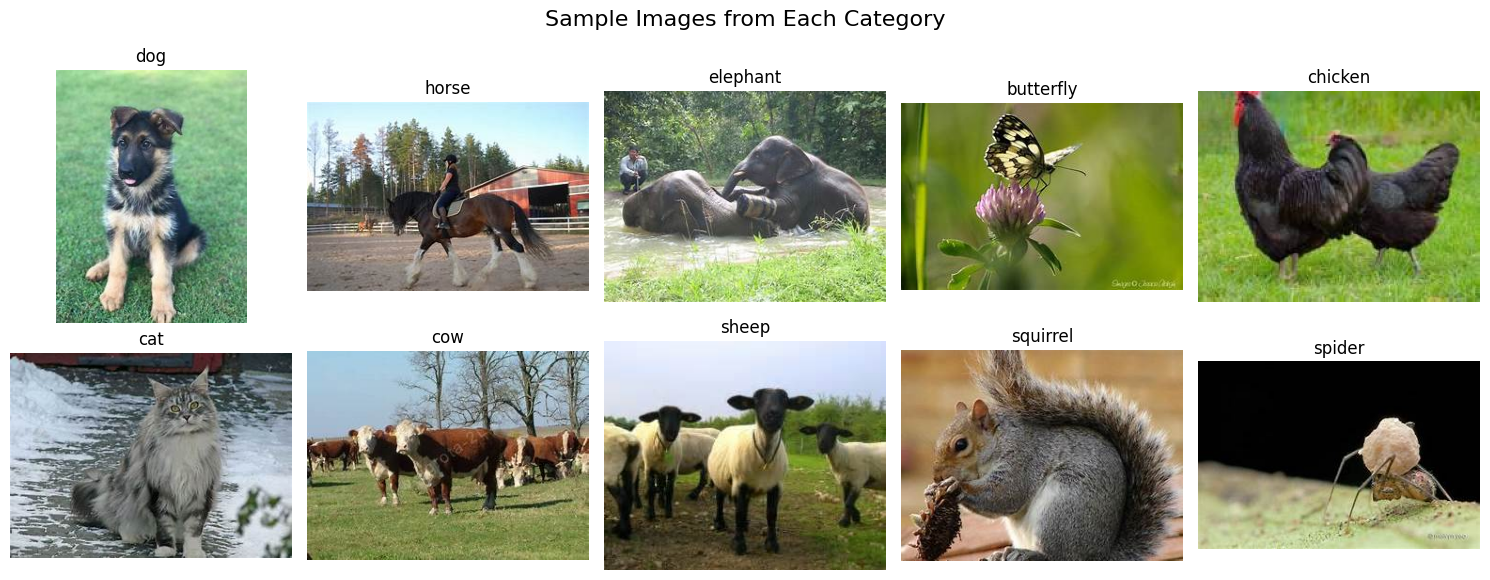

In [9]:
# 1.1 Data Visualization - Sample Images
def visualize_sample_images(categories_dict, num_samples=3):
    """
    Display sample images from each category
    """
    print("\n1.1 Data Visualization - Sample Images")
    print("-" * 45)

    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()

    for i, (italian_name, english_name) in enumerate(categories_dict.items()):
        category_path = os.path.join(raw_img_path, italian_name)
        if not os.path.exists(category_path):
            continue

        all_images = os.listdir(category_path)
        if all_images:
            sample_image = random.choice(all_images)
            img_path = os.path.join(category_path, sample_image)

            try:
                img = Image.open(img_path)
                axes[i].imshow(img)
                axes[i].set_title(f'{english_name}')
                axes[i].axis('off')
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    plt.suptitle('Sample Images from Each Category', fontsize=16)
    plt.tight_layout()
    plt.show()

# Execute visualization
visualize_sample_images(italian_to_english)


1.2 Data Visualization - Multiple Images
---------------------------------------------


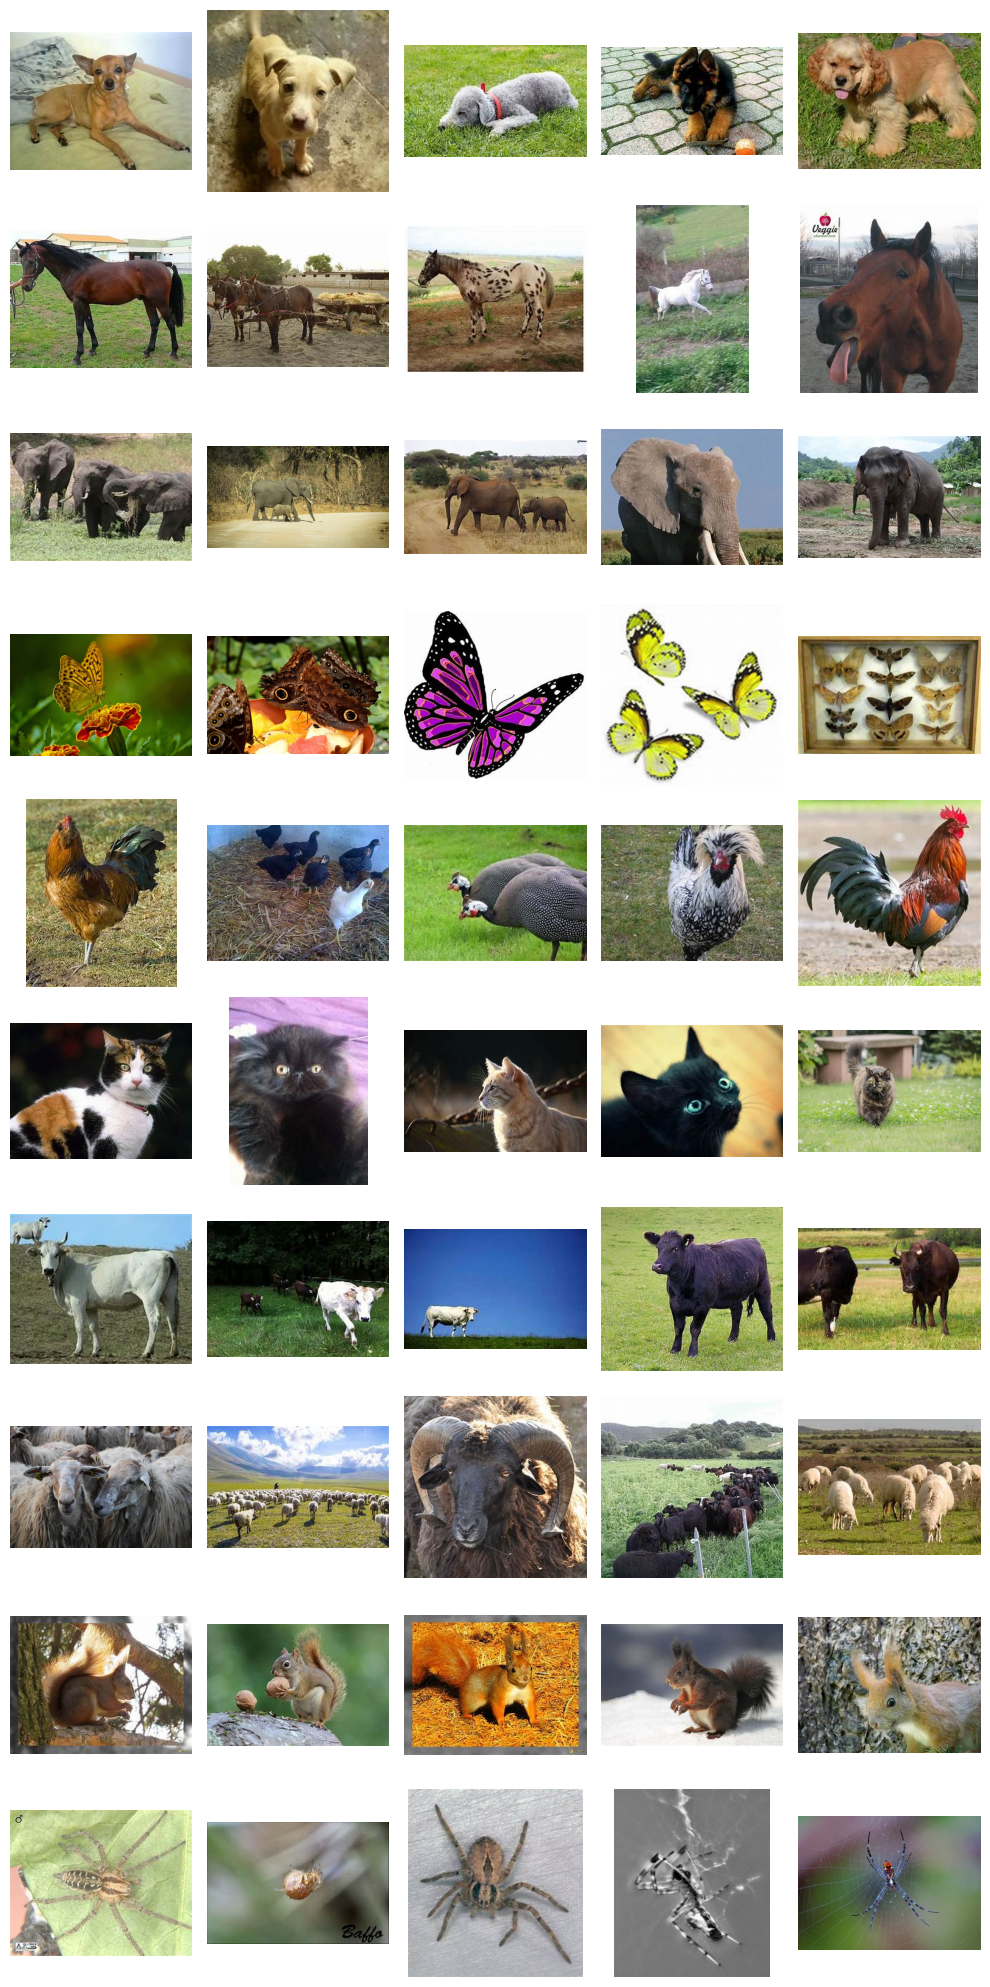

In [10]:
# 1.2 Data Visualization - Multiple Images per Category
def visualize_multiple_images_per_category(categories_dict, images_per_category=5):
    fig, axes = plt.subplots(len(categories_dict), images_per_category, figsize=(images_per_category * 2, len(categories_dict) * 2))
    print("\n1.2 Data Visualization - Multiple Images")
    print("-" * 45)
    if len(categories_dict) == 1:
        axes = np.expand_dims(axes, 0)

    for i, (italian_name, english_name) in enumerate(categories_dict.items()):
        category_path = os.path.join(raw_img_path, italian_name)
        all_images = os.listdir(category_path)
        sample_images = random.sample(all_images, min(images_per_category, len(all_images)))

        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(category_path, img_name)
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

visualize_multiple_images_per_category(italian_to_english, images_per_category=5)

# Properties of Images

In [11]:
# 1.3 Image Properties Analysis
def analyze_image_properties(categories_dict, samples_per_category=20):
    print("\n 1.3 Image Properties Analysis")
    print("-" * 35)

    all_heights = []
    all_widths = []
    all_aspect_ratios = []

    for italian_name, english_name in categories_dict.items():
        category_path = os.path.join(raw_img_path, italian_name)
        all_images = os.listdir(category_path)
        sample_images = random.sample(all_images, min(samples_per_category, len(all_images)))

        category_heights = []
        category_widths = []

        for img_name in sample_images:
            img_path = os.path.join(category_path, img_name)
            img = Image.open(img_path)
            width, height = img.size

            category_heights.append(height)
            category_widths.append(width)
            all_heights.append(height)
            all_widths.append(width)
            all_aspect_ratios.append(width / height)

        if category_heights:
            avg_height = np.mean(category_heights)
            avg_width = np.mean(category_widths)
            print(f"{english_name:<12} | Avg size: {avg_width:.0f}x{avg_height:.0f}")

    # Overall statistics
    print("\nOverall Statistics:")
    print(f"Average width: {np.mean(all_widths):.0f} px")
    print(f"Average height: {np.mean(all_heights):.0f} px")
    print(f"Min dimensions: {min(all_widths)}x{min(all_heights)} px")
    print(f"Max dimensions: {max(all_widths)}x{max(all_heights)} px")
    print(f"Aspect ratio range: {min(all_aspect_ratios):.2f} - {max(all_aspect_ratios):.2f}")

# Execute properties analysis
analyze_image_properties(italian_to_english)


 1.3 Image Properties Analysis
-----------------------------------
dog          | Avg size: 274x242
horse        | Avg size: 284x238
elephant     | Avg size: 384x258
butterfly    | Avg size: 372x282
chicken      | Avg size: 282x248
cat          | Avg size: 473x516
cow          | Avg size: 300x208
sheep        | Avg size: 441x323
squirrel     | Avg size: 284x230
spider       | Avg size: 307x235

Overall Statistics:
Average width: 340 px
Average height: 278 px
Min dimensions: 169x154 px
Max dimensions: 3256x4884 px
Aspect ratio range: 0.56 - 1.95


In [12]:
## Dataset Distribution Analysis with Representation Status
def analyze_dataset_distribution(categories_dict):
    print("\n1.4 Dataset Distribution Analysis")
    print("-" * 35)

    category_counts = {}
    total_images = 0

    for italian_name, english_name in categories_dict.items():
        category_path = os.path.join(raw_img_path, italian_name)
        image_count = len(os.listdir(category_path))
        category_counts[english_name] = image_count
        total_images += image_count

    # Calculate ideal distribution and limits
    ideal_percentage = 10.0  # 10% for 10 categories
    upper_limit = 12.0  # +20% over ideal
    lower_limit = 8.0   # -20% under ideal

    print(f"Ideal distribution: {ideal_percentage:.1f}% per category")
    print(f"Upper limit (+20%): {upper_limit:.1f}%")
    print(f"Lower limit (-20%): {lower_limit:.1f}%")
    print("\nDistribution by category:")
    print("-" * 55)

    for category, count in sorted(category_counts.items(), key=lambda x: x[1], reverse=True):
        percentage = (count / total_images) * 100

        if percentage > upper_limit:
            status = "OVER REPRESENTED"
        elif percentage < lower_limit:
            status = "UNDER REPRESENTED"
        else:
            status = "BALANCED"

        print(f"{category:<12} | {count:>5} images | {percentage:>5.1f}% | {status:<16}")

    print(f"\nTotal images: {total_images}")

    return category_counts, total_images

# Execute distribution analysis
category_counts, total_images = analyze_dataset_distribution(italian_to_english)


1.4 Dataset Distribution Analysis
-----------------------------------
Ideal distribution: 10.0% per category
Upper limit (+20%): 12.0%
Lower limit (-20%): 8.0%

Distribution by category:
-------------------------------------------------------
dog          |  4863 images |  18.6% | OVER REPRESENTED
spider       |  4821 images |  18.4% | OVER REPRESENTED
chicken      |  3098 images |  11.8% | BALANCED        
horse        |  2623 images |  10.0% | BALANCED        
butterfly    |  2112 images |   8.1% | BALANCED        
cow          |  1866 images |   7.1% | UNDER REPRESENTED
squirrel     |  1862 images |   7.1% | UNDER REPRESENTED
sheep        |  1820 images |   7.0% | UNDER REPRESENTED
cat          |  1668 images |   6.4% | UNDER REPRESENTED
elephant     |  1446 images |   5.5% | UNDER REPRESENTED

Total images: 26179


# Processing

In [13]:
# Configuration Parameters
TARGET_SIZE = (224, 224)
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

print("Configuration parameters defined:")
print(f"TARGET_SIZE: {TARGET_SIZE}")
print(f"BATCH_SIZE: {BATCH_SIZE}")
print(f"VALIDATION_SPLIT: {VALIDATION_SPLIT}")

# 1. Apply Normalization
print("\n1. Applying Normalization")
print("-" * 25)

normalization_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values from [0,255] to [0,1]
    validation_split=VALIDATION_SPLIT
)

print("Normalization configured: pixel values scaled from [0,255] to [0,1]")

# 2. Apply Resizing
print("\n2. Applying Resizing")
print("-" * 20)

train_generator = normalization_datagen.flow_from_directory(
    raw_img_path,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=42
)

validation_generator = normalization_datagen.flow_from_directory(
    raw_img_path,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=42
)

print(f"Resizing applied: all images resized to {TARGET_SIZE}")
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")

Configuration parameters defined:
TARGET_SIZE: (224, 224)
BATCH_SIZE: 32
VALIDATION_SPLIT: 0.2

1. Applying Normalization
-------------------------
Normalization configured: pixel values scaled from [0,255] to [0,1]

2. Applying Resizing
--------------------
Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.
Resizing applied: all images resized to (224, 224)
Training samples: 20947
Validation samples: 5232


In [14]:
# Data Augmentation Configuration
augmentation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=VALIDATION_SPLIT,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

# Create training generator WITH augmentation
train_generator = augmentation_datagen.flow_from_directory(
    raw_img_path,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=42
)

# Validation generator WITHOUT augmentation
validation_generator = normalization_datagen.flow_from_directory(
    raw_img_path,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=42
)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [15]:
# 3. Train/Validation Split
print("\n3. Train/Validation Split")
print("-" * 25)

print(f"Using validation split: {VALIDATION_SPLIT}")
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")

# Calculate split percentages
total_samples = train_generator.samples + validation_generator.samples
train_percentage = (train_generator.samples / total_samples) * 100
val_percentage = (validation_generator.samples / total_samples) * 100

print(f"Dataset split: {train_percentage:.1f}% training, {val_percentage:.1f}% validation")
print(f"Classes identified: {list(train_generator.class_indices.keys())}")


3. Train/Validation Split
-------------------------
Using validation split: 0.2
Training samples: 20947
Validation samples: 5232
Dataset split: 80.0% training, 20.0% validation
Classes identified: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [16]:
# 2. Model Architecture
print("\n2. CNN Model Architecture Design")
print("-" * 35)

def create_cnn_model(input_shape=(224, 224, 3), num_classes=10):
    """
    Create a CNN model for animal classification
    """
    model = Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Fourth Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Classifier
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Create the model
model = create_cnn_model()
model.summary()

print("CNN architecture created successfully")
print("Features:")
print("- 4 convolutional blocks with increasing filters")
print("- MaxPooling for dimensionality reduction")
print("- Fully connected layers for classification")
print("- Dropout for regularization")
print("- Softmax output for 10-class classification")


2. CNN Model Architecture Design
-----------------------------------


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,683,658 (36.94 MB)

 Trainable params: 9,683,658 (36.94 MB)

 Non-trainable params: 0 (0.00 B)

CNN architecture created successfully
Features:
- 4 convolutional blocks with increasing filters
- MaxPooling for dimensionality reduction
- Fully connected layers for classification
- Dropout for regularization
- Softmax output for 10-class classification


In [17]:
# 3. Model Training
print("\n3. Model Training Configuration")
print("-" * 35)

# 3.1 Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully")
print("Optimizer: Adam")
print("Loss function: Categorical Crossentropy")
print("Metric: Accuracy")

# 3.2 Configure callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

print("\nEarly stopping configured:")
print("- Monitor: val_loss")
print("- Patience: 5 epochs")
print("- Restore best weights: True")

# 3.3 Calculate training parameters
steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = validation_generator.samples // BATCH_SIZE

print(f"\nTraining parameters:")
print(f"- Steps per epoch: {steps_per_epoch}")
print(f"- Validation steps: {validation_steps}")
print(f"- Batch size: {BATCH_SIZE}")


3. Model Training Configuration
-----------------------------------
Model compiled successfully
Optimizer: Adam
Loss function: Categorical Crossentropy
Metric: Accuracy

Early stopping configured:
- Monitor: val_loss
- Patience: 5 epochs
- Restore best weights: True

Training parameters:
- Steps per epoch: 654
- Validation steps: 163
- Batch size: 32


In [18]:
# 3.4 Train the model
print("\nStarting Model Training")
print("-" * 25)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    verbose=1
)

print("\nModel training completed!")
print(f"Training stopped at epoch: {len(history.history['loss'])}")
print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")


Starting Model Training
-------------------------


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 376s 561ms/step - accuracy: 0.2030 - loss: 2.1913 - val_accuracy: 0.4013 - val_loss: 1.7033
Epoch 2/30
  1/654 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.3438 - loss: 2.0083

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.3438 - loss: 2.0083 - val_accuracy: 0.4034 - val_loss: 1.7053
Epoch 3/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 253s 387ms/step - accuracy: 0.3727 - loss: 1.7931 - val_accuracy: 0.5084 - val_loss: 1.3754
Epoch 4/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5625 - loss: 1.4946 - val_accuracy: 0.5042 - val_loss: 1.3783
Epoch 5/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 253s 387ms/step - accuracy: 0.4554 - loss: 1.5738 - val_accuracy: 0.5627 - val_loss: 1.2642
Epoch 6/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5625 - loss: 1.2288 - val_accuracy: 0.5548 - val_loss: 1.2724
Epoch 7/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 253s 386ms/step - accuracy: 0.5067 - loss: 1.4351 - val_accuracy: 0.5727 - val_loss: 1.2255
Epoch 8/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6250 - loss: 1.2744 - val_accuracy: 0.5704 - val_loss: 1.2209
Epoch 9/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 252s 385ms/step - accuracy: 0.5355 - loss: 1.3507 - val_acc


4. Model Evaluation
--------------------
Found 5232 images belonging to 10 classes.
Generating predictions...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step
Overall Validation Accuracy: 0.7074

Classification Report:
              precision    recall  f1-score   support

        cane      0.724     0.671     0.696       972
     cavallo      0.667     0.660     0.663       524
    elefante      0.643     0.668     0.655       289
    farfalla      0.722     0.825     0.770       422
     gallina      0.686     0.880     0.771       619
       gatto      0.638     0.625     0.631       333
       mucca      0.549     0.660     0.599       373
      pecora      0.675     0.547     0.604       364
       ragno      0.882     0.825     0.853       964
  scoiattolo      0.635     0.454     0.530       372

    accuracy                          0.707      5232
   macro avg      0.682     0.681     0.677      5232
weighted avg      0.711     0.707     0.705      5232


Plotting Training History...


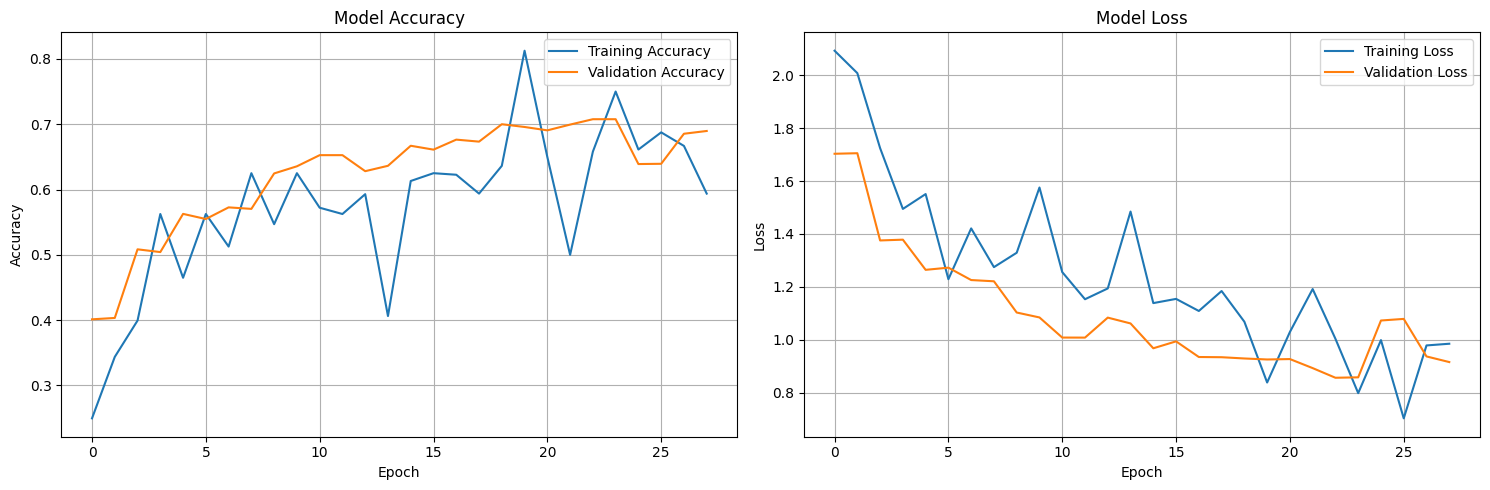

Plotting Confusion Matrix...


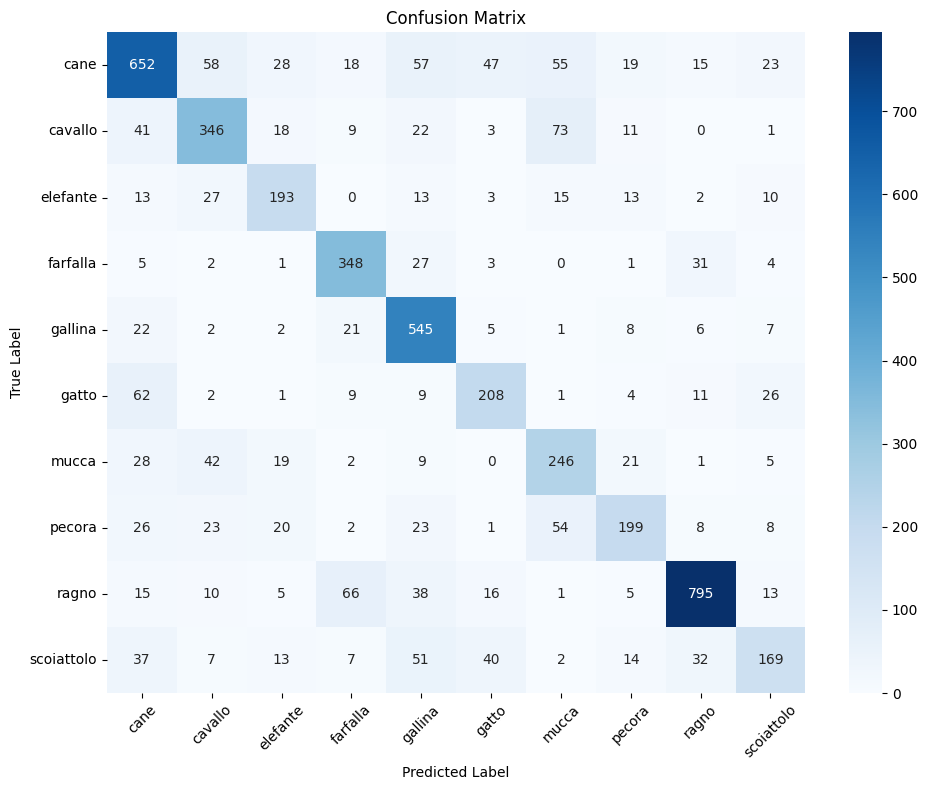

In [26]:
# 4. Model Evaluation
print("\n4. Model Evaluation")
print("-" * 20)

# Create validation generator with shuffle=False for correct evaluation
validation_generator = normalization_datagen.flow_from_directory(
    raw_img_path,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,  # Critical for correct evaluation
    seed=42
)

# Evaluation function
def evaluate_model(model, validation_generator):
    # Get predictions
    print("Generating predictions...")
    y_pred = model.predict(validation_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = validation_generator.classes

    # Get class names
    class_names = list(validation_generator.class_indices.keys())

    # Calculate metrics
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

    accuracy = accuracy_score(y_true, y_pred_classes)
    cm = confusion_matrix(y_true, y_pred_classes)
    report = classification_report(y_true, y_pred_classes, target_names=class_names, digits=3)

    return accuracy, cm, report, class_names

# Execute evaluation
accuracy, cm, report, class_names = evaluate_model(model, validation_generator)

print(f"Overall Validation Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

# Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

print("\nPlotting Training History...")
plot_training_history(history)

# Plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

print("Plotting Confusion Matrix...")
plot_confusion_matrix(cm, class_names)

In [27]:
# Debug: Investigate the prediction issue
print("\nDebug: Detailed Prediction Analysis")
print("-" * 35)

# Get predictions and true labels
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

print(f"Number of samples: {len(y_true)}")
print(f"Unique true classes: {np.unique(y_true)}")
print(f"Unique predicted classes: {np.unique(y_pred_classes)}")

# Check prediction distribution per class
print("\nPrediction distribution per class:")
for i, class_name in enumerate(validation_generator.class_indices.keys()):
    class_mask = y_true == i
    if np.sum(class_mask) > 0:
        pred_distribution = np.bincount(y_pred_classes[class_mask], minlength=len(validation_generator.class_indices))
        most_common_pred = np.argmax(pred_distribution)
        print(f"{class_name:<12}: {np.sum(class_mask):>4} samples -> most predicted: {list(validation_generator.class_indices.keys())[most_common_pred]}")

# Check if model is predicting only certain classes
print(f"\nOverall prediction distribution:")
for i, class_name in enumerate(validation_generator.class_indices.keys()):
    count = np.sum(y_pred_classes == i)
    print(f"{class_name:<12}: {count:>4} predictions")

# Verify the model output
print(f"\nModel output range: [{np.min(y_pred):.4f}, {np.max(y_pred):.4f}]")
print(f"Sample predictions (first 5):")
print(y_pred[:5])


Debug: Detailed Prediction Analysis
-----------------------------------
164/164 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step
Number of samples: 5232
Unique true classes: [0 1 2 3 4 5 6 7 8 9]
Unique predicted classes: [0 1 2 3 4 5 6 7 8 9]

Prediction distribution per class:
cane        :  972 samples -> most predicted: cane
cavallo     :  524 samples -> most predicted: cavallo
elefante    :  289 samples -> most predicted: elefante
farfalla    :  422 samples -> most predicted: farfalla
gallina     :  619 samples -> most predicted: gallina
gatto       :  333 samples -> most predicted: gatto
mucca       :  373 samples -> most predicted: mucca
pecora      :  364 samples -> most predicted: pecora
ragno       :  964 samples -> most predicted: ragno
scoiattolo  :  372 samples -> most predicted: scoiattolo

Overall prediction distribution:
cane        :  901 predictions
cavallo     :  519 predictions
elefante    :  300 predictions
farfalla    :  482 predictions
gallina     :  794 predictions
gatto     

In [28]:
# Debug: Verificar consistencia de las métricas
print("\nDebug: Metric Consistency Check")
print("-" * 35)

# Evaluar con Keras (mismo método que durante entrenamiento)
keras_eval = model.evaluate(validation_generator, verbose=0)
print(f"Keras evaluate() accuracy: {keras_eval[1]:.4f}")

# Verificar el generador
print(f"Validation generator samples: {validation_generator.samples}")
print(f"Validation generator classes: {validation_generator.classes[:10]}...")

# Verificar si el generador se reseteó
validation_generator.reset()
y_pred_keras = model.predict(validation_generator)
y_pred_classes_keras = np.argmax(y_pred_keras, axis=1)

keras_accuracy = np.mean(y_pred_classes_keras == validation_generator.classes)
print(f"Manual accuracy from predictions: {keras_accuracy:.4f}")


Debug: Metric Consistency Check
-----------------------------------
Keras evaluate() accuracy: 0.7074
Validation generator samples: 5232
Validation generator classes: [0 0 0 0 0 0 0 0 0 0]...
164/164 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step
Manual accuracy from predictions: 0.7074


In [29]:
# Paso 1: Calcular Class Weights (después de crear los generadores)
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    'balanced',
    classes=np.arange(len(train_generator.class_indices)),
    y=train_generator.classes
)

class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Class Weights:")
for i, class_name in enumerate(train_generator.class_indices.keys()):
    print(f"{class_name}: {class_weight_dict[i]:.2f}")

Class Weights:
cane: 0.54
cavallo: 1.00
elefante: 1.81
farfalla: 1.24
gallina: 0.84
gatto: 1.57
mucca: 1.40
pecora: 1.44
ragno: 0.54
scoiattolo: 1.41


In [30]:
# Paso 2: En el entrenamiento, agregar class_weight_dict
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    class_weight=class_weight_dict,  # ← ESTA LÍNEA ES NUEVA
    verbose=1
)

Epoch 1/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 258s 390ms/step - accuracy: 0.6379 - loss: 1.0868 - val_accuracy: 0.6461 - val_loss: 1.0544
Epoch 2/30
  1/654 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.7188 - loss: 1.0878

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


654/654 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7188 - loss: 1.0878 - val_accuracy: 0.6357 - val_loss: 1.0918
Epoch 3/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 252s 386ms/step - accuracy: 0.6432 - loss: 1.0563 - val_accuracy: 0.7030 - val_loss: 0.8842
Epoch 4/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5000 - loss: 2.0810 - val_accuracy: 0.7017 - val_loss: 0.9025
Epoch 5/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 251s 383ms/step - accuracy: 0.6541 - loss: 1.0310 - val_accuracy: 0.6748 - val_loss: 0.9857
Epoch 6/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6250 - loss: 1.1467 - val_accuracy: 0.6823 - val_loss: 0.9643
Epoch 7/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 251s 384ms/step - accuracy: 0.6596 - loss: 1.0216 - val_accuracy: 0.6777 - val_loss: 0.9849
Epoch 8/30
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7188 - loss: 0.9473 - val_accuracy: 0.6702 - val_loss: 1.0088



Evaluation of Model with Class Weights
----------------------------------------
Generating predictions...
164/164 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step
Validation Accuracy with Class Weights: 0.7034

Classification Report with Class Weights:
              precision    recall  f1-score   support

        cane      0.821     0.557     0.663       972
     cavallo      0.674     0.628     0.650       524
    elefante      0.664     0.758     0.708       289
    farfalla      0.655     0.915     0.764       422
     gallina      0.891     0.805     0.846       619
       gatto      0.505     0.712     0.591       333
       mucca      0.483     0.786     0.599       373
      pecora      0.730     0.514     0.603       364
       ragno      0.929     0.776     0.846       964
  scoiattolo      0.514     0.651     0.574       372

    accuracy                          0.703      5232
   macro avg      0.687     0.710     0.684      5232
weighted avg      0.740     0.703     0.708      5232

Co

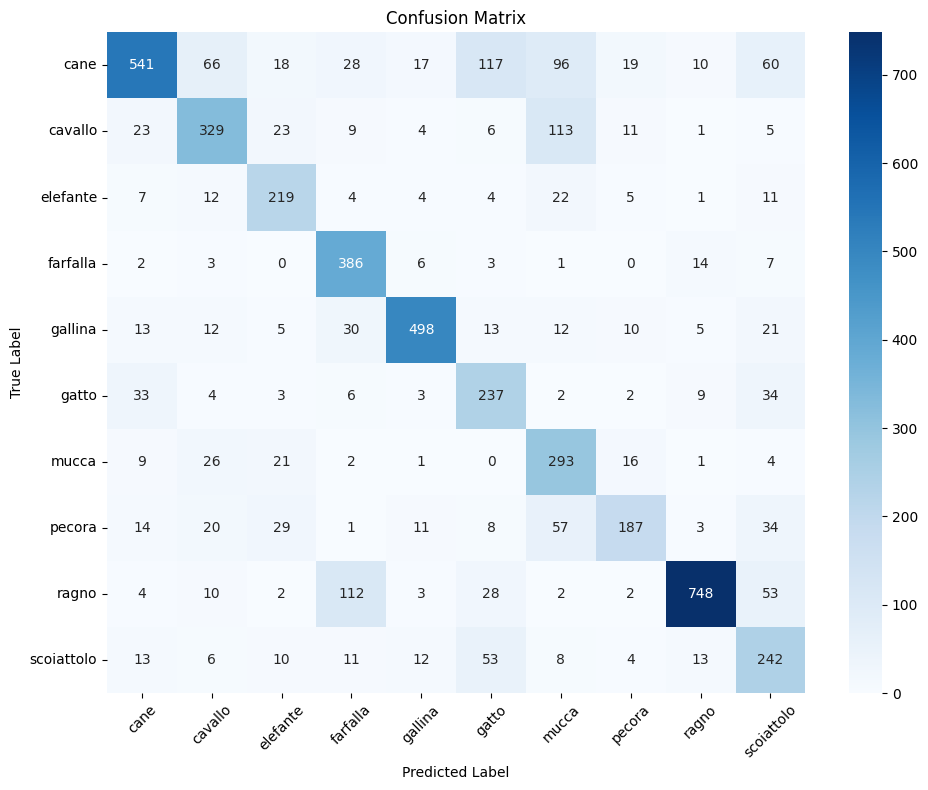


COMPARISON: Before vs After Class Weights
---------------------------------------------
Without Class Weights: 0.7074
With Class Weights:    0.7034
Improvement:           -0.0040


In [31]:
# Evaluation of Model with Class Weights
print("\nEvaluation of Model with Class Weights")
print("-" * 40)

# Reset validation generator to ensure correct order
validation_generator.reset()

# Evaluate using the same function que usamos antes
accuracy_classweight, cm_classweight, report_classweight, class_names = evaluate_model(model, validation_generator)

print(f"Validation Accuracy with Class Weights: {accuracy_classweight:.4f}")
print("\nClassification Report with Class Weights:")
print(report_classweight)

# Plot confusion matrix
print("Confusion Matrix with Class Weights:")
plot_confusion_matrix(cm_classweight, class_names)

# Compare with previous results
print("\nCOMPARISON: Before vs After Class Weights")
print("-" * 45)
print(f"Without Class Weights: {0.7074:.4f}")  # Resultado anterior
print(f"With Class Weights:    {accuracy_classweight:.4f}")
print(f"Improvement:           {accuracy_classweight - 0.7074:+.4f}")

In [32]:
# 5. Transfer Learning with ResNet50
print("\n5. Transfer Learning with ResNet50")
print("-" * 35)

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load pre-trained ResNet50
print("Loading ResNet50 pre-trained on ImageNet...")
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze base model
base_model.trainable = False
print("Base model layers frozen")

# Build custom classifier
print("Building custom classifier...")
resnet_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
resnet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("ResNet50 transfer learning model ready")
resnet_model.summary()


5. Transfer Learning with ResNet50
-----------------------------------
Loading ResNet50 pre-trained on ImageNet...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Base model layers frozen
Building custom classifier...
ResNet50 transfer learning model ready


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [33]:
# Train ResNet50 Transfer Learning Model
print("\nTraining ResNet50 Transfer Learning Model")
print("-" * 45)

# Calculate steps
steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = validation_generator.samples // BATCH_SIZE

print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")

# Train the model
history_resnet = resnet_model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=20,  # Less epochs for transfer learning
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    verbose=1
)

print("\nResNet50 training completed!")
print(f"Final training accuracy: {history_resnet.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {history_resnet.history['val_accuracy'][-1]:.4f}")


Training ResNet50 Transfer Learning Model
---------------------------------------------
Steps per epoch: 654
Validation steps: 163
Epoch 1/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 280s 405ms/step - accuracy: 0.1799 - loss: 2.2681 - val_accuracy: 0.2364 - val_loss: 2.1160
Epoch 2/20
  1/654 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.2188 - loss: 2.0538

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2188 - loss: 2.0538 - val_accuracy: 0.2373 - val_loss: 2.1161
Epoch 3/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 254s 388ms/step - accuracy: 0.2371 - loss: 2.1532 - val_accuracy: 0.2611 - val_loss: 2.0831
Epoch 4/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.2188 - loss: 2.0729 - val_accuracy: 0.2619 - val_loss: 2.0826
Epoch 5/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 253s 386ms/step - accuracy: 0.2530 - loss: 2.1204 - val_accuracy: 0.2906 - val_loss: 2.0568
Epoch 6/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.2500 - loss: 2.1407 - val_accuracy: 0.2903 - val_loss: 2.0562
Epoch 7/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 255s 390ms/step - accuracy: 0.2632 - loss: 2.1036 - val_accuracy: 0.3029 - val_loss: 2.0265
Epoch 8/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.1875 - loss: 2.3171 - val_accuracy: 0.3006 - val_loss: 2.0251
Epoch 9/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 254s 388ms/step - accuracy: 0.2691 - loss: 2.0867 - val_acc

In [35]:
# Prepare ResNet50 Evaluation
print("\nPreparing ResNet50 Evaluation")
print("-" * 30)

def evaluate_resnet_model():
    """
    Comprehensive evaluation for ResNet50 model
    """
    print("Evaluating ResNet50 model...")

    # Reset generator
    validation_generator.reset()

    # Get predictions
    y_pred = resnet_model.predict(validation_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = validation_generator.classes

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred_classes)
    cm = confusion_matrix(y_true, y_pred_classes)
    report = classification_report(y_true, y_pred_classes,
                                  target_names=list(validation_generator.class_indices.keys()),
                                  digits=3)

    return accuracy, cm, report

# Evaluation function ready
print("ResNet50 evaluation functions prepared")
print("We'll execute this after training completes")

# Also prepare comparison function
def compare_models():
    """
    Compare all models we've trained
    """
    print("\n" + "="*50)
    print("MODEL COMPARISON SUMMARY")
    print("="*50)

    models_data = {
        "CNN Baseline": 0.7074,
        "CNN + Class Weights": 0.7034,
        "ResNet50 Transfer": "Pending"  # Will update after evaluation
    }

    for model_name, accuracy in models_data.items():
        print(f"{model_name:<25}: {accuracy}")

    print("\nBest model will be selected for deployment")

print("Model comparison function ready")


Preparing ResNet50 Evaluation
------------------------------
ResNet50 evaluation functions prepared
We'll execute this after training completes
Model comparison function ready



ResNet50 Model Evaluation
------------------------------
164/164 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step
ResNet50 Validation Accuracy: 0.3563

ResNet50 Classification Report:
              precision    recall  f1-score   support

        cane      0.312     0.608     0.413       972
     cavallo      0.287     0.347     0.314       524
    elefante      0.000     0.000     0.000       289
    farfalla      0.443     0.512     0.475       422
     gallina      0.326     0.457     0.381       619
       gatto      0.000     0.000     0.000       333
       mucca      0.333     0.005     0.011       373
      pecora      0.000     0.000     0.000       364
       ragno      0.439     0.612     0.511       964
  scoiattolo      0.000     0.000     0.000       372

    accuracy                          0.356      5232
   macro avg      0.214     0.254     0.210      5232
weighted avg      0.266     0.356     0.286      5232

ResNet50 Confusion Matrix:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


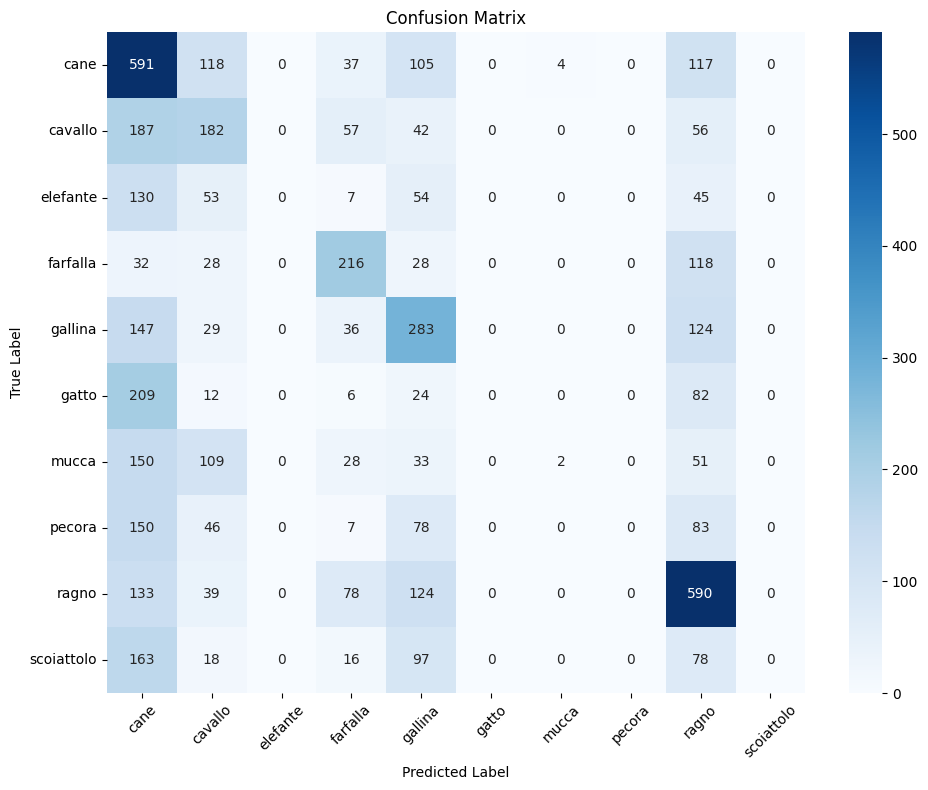


FINAL MODEL COMPARISON
CNN Baseline:               0.7074
CNN + Class Weights:        0.7034
ResNet50 Transfer Learning: 0.3563


In [37]:
# Import necessary metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate ResNet50 Model
print("\nResNet50 Model Evaluation")
print("-" * 30)

# Reset validation generator
validation_generator.reset()

# Get predictions
y_pred_resnet = resnet_model.predict(validation_generator)
y_pred_classes_resnet = np.argmax(y_pred_resnet, axis=1)
y_true = validation_generator.classes

# Calculate metrics
accuracy_resnet = accuracy_score(y_true, y_pred_classes_resnet)
cm_resnet = confusion_matrix(y_true, y_pred_classes_resnet)
report_resnet = classification_report(y_true, y_pred_classes_resnet,
                                    target_names=list(validation_generator.class_indices.keys()),
                                    digits=3)

print(f"ResNet50 Validation Accuracy: {accuracy_resnet:.4f}")
print("\nResNet50 Classification Report:")
print(report_resnet)

# Plot confusion matrix
print("ResNet50 Confusion Matrix:")
plot_confusion_matrix(cm_resnet, list(validation_generator.class_indices.keys()))

# Compare all models
print("\n" + "="*50)
print("FINAL MODEL COMPARISON")
print("="*50)
print(f"CNN Baseline:               {0.7074:.4f}")
print(f"CNN + Class Weights:        {0.7034:.4f}")
print(f"ResNet50 Transfer Learning: {accuracy_resnet:.4f}")